In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Explaritory data analysis

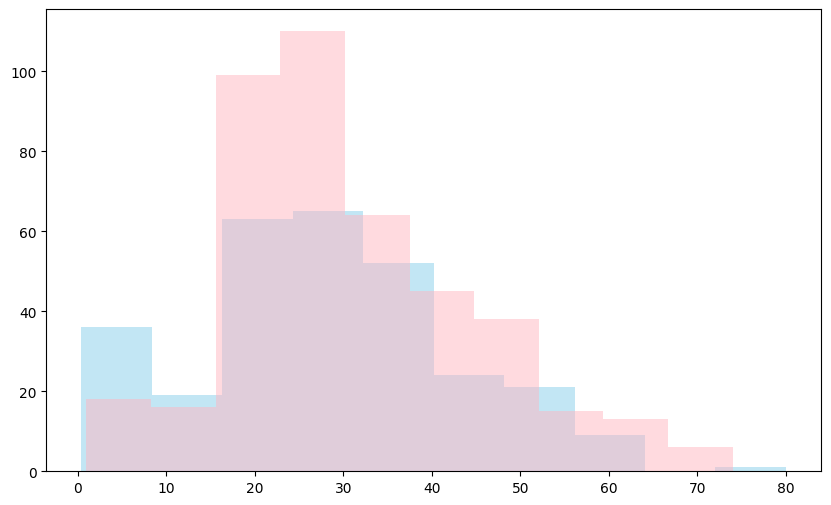

In [4]:
survived_by_age     = train_data[train_data['Survived'] == 1]['Age']
not_survived_by_age = train_data[train_data['Survived'] == 0]['Age']
plt.figure(figsize=(10, 6))
plt.hist(survived_by_age, bins = 10, color='skyblue', alpha=0.5, label='Survived')

plt.hist(not_survived_by_age, bins = 10, color='lightpink', alpha=0.5, label='Not Survived')
plt.show()

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
rate_women_total = len(women)/len(train_data)
print("% of women who survived:", rate_women)
print("% of women in the ship", rate_women_total)



% of women who survived: 0.7420382165605095
% of women in the ship 0.35241301907968575


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
rate_men_total = len(men)/len(train_data)
print("% of men who survived:", rate_men)
print("% of men in the ship", rate_men_total)

% of men who survived: 0.18890814558058924
% of men in the ship 0.6475869809203143


([<matplotlib.patches.Wedge at 0x78a035ebd540>,
 [Text(-0.9838646807152013, -0.4919454136803953, 'male'),
  Text(0.9838646346559433, 0.4919455057964524, 'female')],
 [Text(-0.5366534622082916, -0.2683338620074883, '64.8%'),
  Text(0.53665343708506, 0.2683339122526104, '35.2%')])

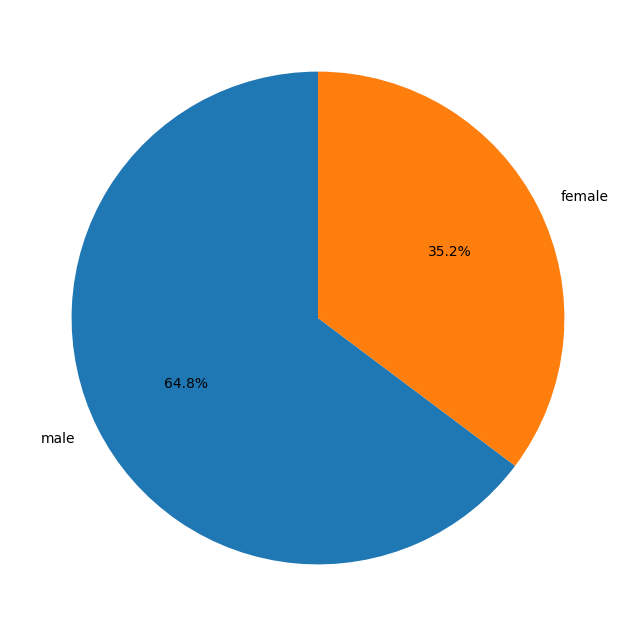

In [7]:
plt.figure(figsize=(8, 8))
counts = train_data['Sex'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)


Index(['female', 'male'], dtype='object', name='Sex')


([<matplotlib.patches.Wedge at 0x78a036039720>,
 [Text(-0.9263708100177275, -0.5931585979711493, 'female Survived'),
  Text(0.9263707544822074, 0.5931586847042417, 'male Survived')],
 [Text(-0.5052931691005785, -0.32354105343880873, '68.1%'),
  Text(0.5052931388084767, 0.3235411007477682, '31.9%')])

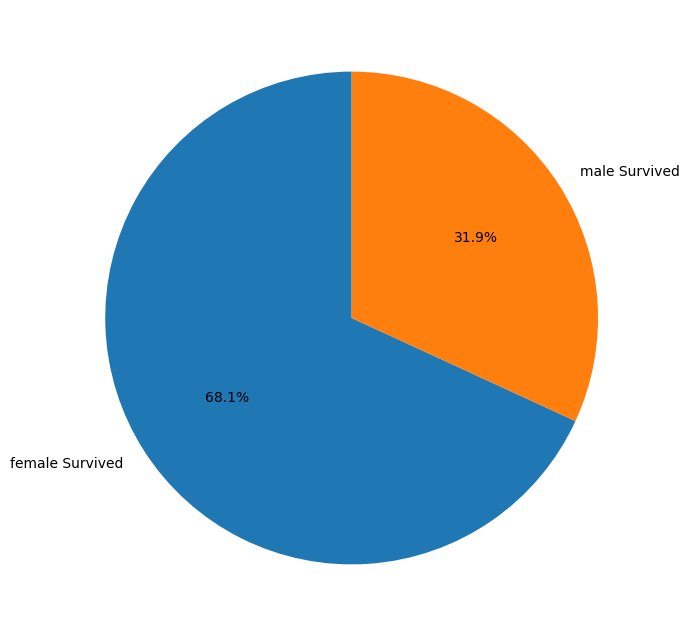

In [8]:
plt.figure(figsize=(8, 8))
# print(train_data.loc[train_data.Survived == 1]['Sex'])
counts = train_data.loc[train_data.Survived == 1]['Sex'].value_counts()
print(counts.index)
plt.pie(counts, labels=counts.index + ' Survived', autopct='%1.1f%%', startangle=90)

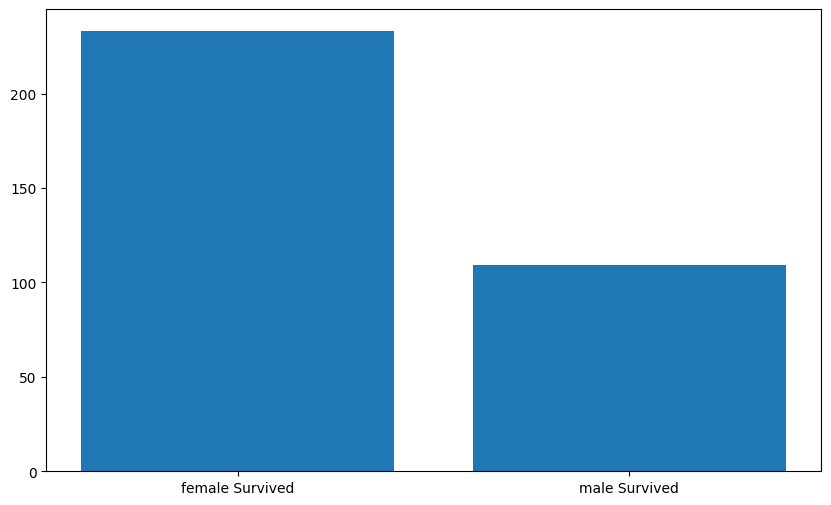

In [9]:
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index + ' Survived', counts)

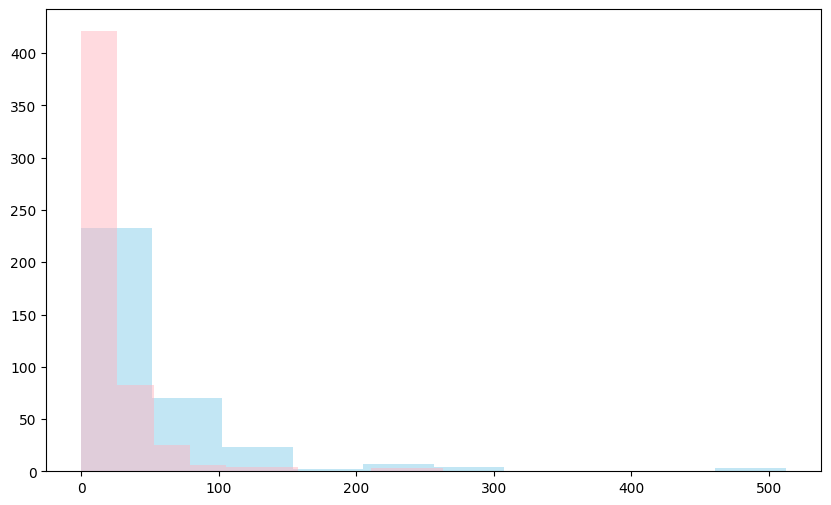

In [10]:
survived_by_fare     = train_data[train_data['Survived'] == 1]['Fare']
not_survived_by_fare = train_data[train_data['Survived'] == 0]['Fare']
plt.figure(figsize=(10, 6))
plt.hist(survived_by_fare, bins = 10, color='skyblue', alpha=0.5, label='Survived')

plt.hist(not_survived_by_fare, bins = 10, color='lightpink', alpha=0.5, label='Not Survived')
plt.show()

As the data points are skewed to the roght side we can apply log transformation to the distribustion which is effective for reducing right-skewness. But we need to be careful about zero and nagtive values
To be able to handle them we can remove negative and 0 values or add small value to all the data of fare (+1)

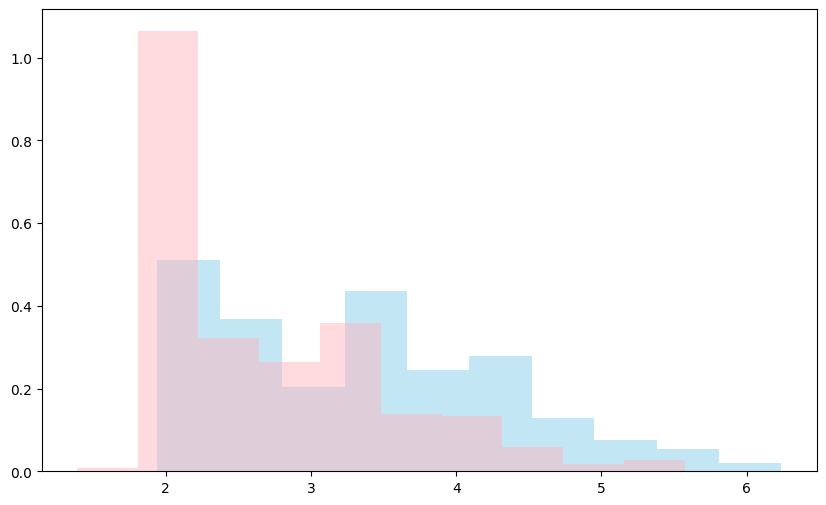

In [11]:
# from scipy.stats import boxcox
# train_data ['Fare_log'], _= boxcox(train_data['Fare'])
train_data = train_data[(train_data['Fare'] > 0)]
train_data ['Fare_log']= np.log(train_data['Fare'])
survived_by_fare     = train_data[train_data['Survived'] == 1]['Fare_log']
not_survived_by_fare = train_data[train_data['Survived'] == 0]['Fare_log']
plt.figure(figsize=(10, 6))
plt.hist(survived_by_fare, bins = 10, density=True, color='skyblue', alpha=0.5, label='Survived')

plt.hist(not_survived_by_fare, bins = 10, density=True, color='lightpink', alpha=0.5, label='Not Survived')
plt.show()

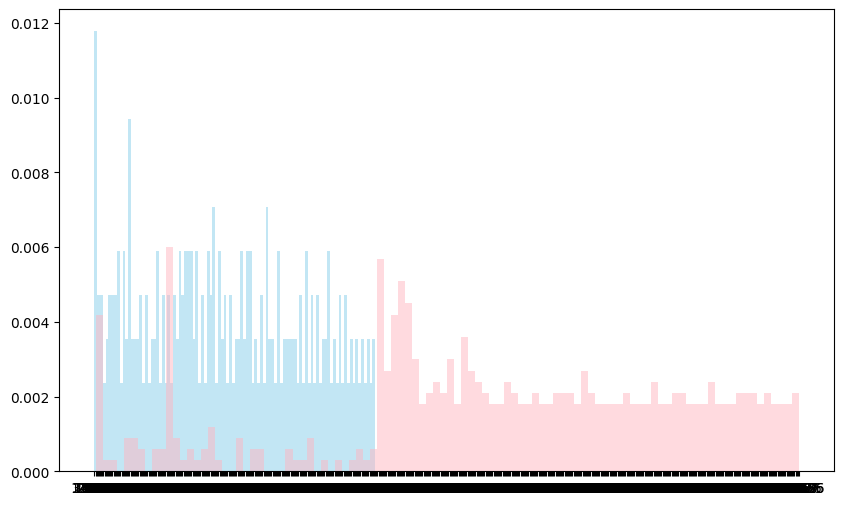

In [12]:
from scipy import stats
train_data['String_Part_Ticket'] = train_data['Ticket'].str.extract(r'([a-zA-Z]+)')
train_data['Number_Part_Ticket'] = train_data['Ticket'].str.extract(r'(\d+)')
num_nan = train_data['Number_Part_Ticket'].isna().sum()
survived_by_ticket     = train_data[train_data['Survived'] == 1]['Number_Part_Ticket']
not_survived_by_ticket = train_data[train_data['Survived'] == 0]['Number_Part_Ticket']
plt.figure(figsize=(10, 6))
plt.hist(survived_by_ticket, bins = 100, density=True, color='skyblue', alpha=0.5, label='Survived')

plt.hist(not_survived_by_ticket, bins =100, density=True, color='lightpink', alpha=0.5, label='Not Survived')
plt.show()





Seems like the numerical part of Ticket distribution affected by some outliers. To get rid of these data we can remove them using zscore

(852, 16)


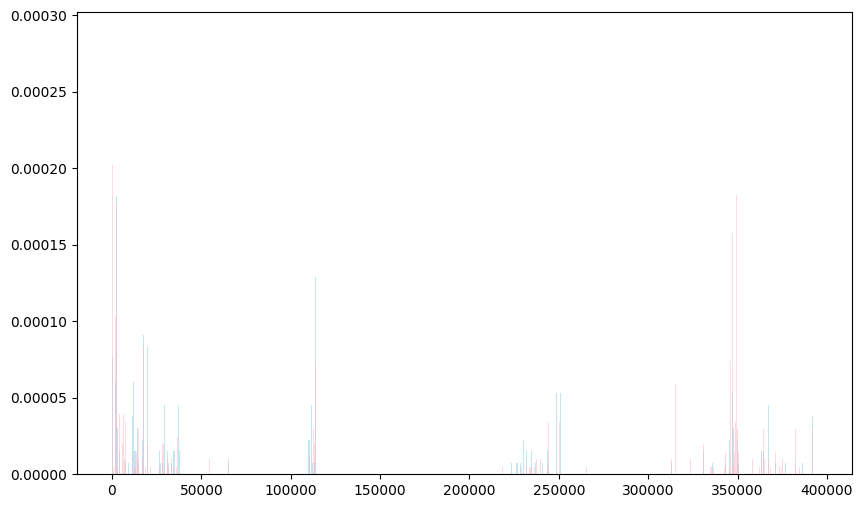

In [13]:
train_data['Number_Part_Ticket_float'] = train_data['Number_Part_Ticket'].astype(float)
# print(train_data.shape)
# remove the outliers based on train data
z_scores = stats.zscore(train_data['Number_Part_Ticket_float'])
threshold = 3
train_data1 = train_data[(z_scores < threshold) & (z_scores > -threshold)]
print(train_data1.shape)

# print(train_data['Number_Part_Ticket'])
# train_data = train_data[(train_data['Number_Part_Ticket_float'] > 0)]
# train_data ['Number_Part_Ticket_float_log']= np.sqrt(train_data['Number_Part_Ticket_float'])

survived_by_ticket_float    = train_data1[train_data1['Survived'] == 1]['Number_Part_Ticket_float']
not_survived_by_ticket_float = train_data1[train_data1['Survived'] == 0]['Number_Part_Ticket_float']
plt.figure(figsize=(10, 6))
plt.hist(survived_by_ticket_float, bins = 1000, density=True, color='skyblue', alpha=0.5, label='Survived')

plt.hist(not_survived_by_ticket_float, bins =1000, density=True, color='lightpink', alpha=0.5, label='Not Survived')
plt.show()


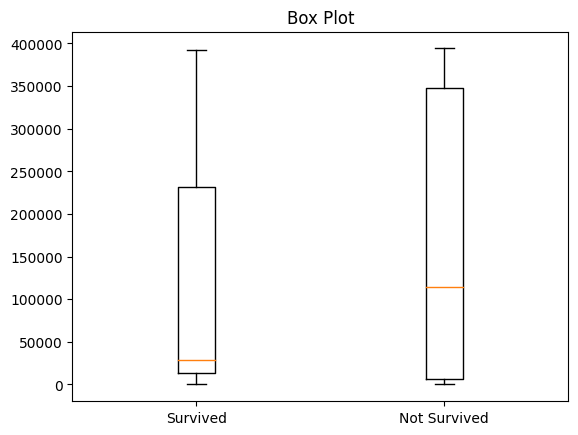

In [14]:

plt.boxplot([survived_by_ticket_float, not_survived_by_ticket_float], labels=['Survived', 'Not Survived'])
plt.title('Box Plot')
plt.show()

In [15]:
num_nan = train_data['Cabin'].isna().sum()
print(num_nan)

675


There are too many NaN values in the Cabin column so we can remove it from our analysis

Lets take a look at PassengerId

0
int64


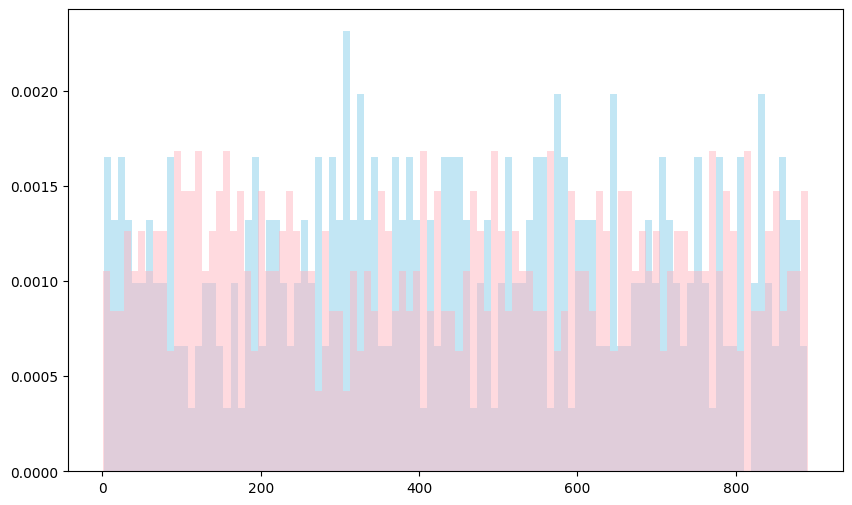

In [16]:
num_nan = train_data['PassengerId'].isna().sum()
print(num_nan)
print(train_data['PassengerId'].dtype)
survived_by_PassengerID     = train_data[train_data['Survived'] == 1]['PassengerId']
not_survived_by_PassengerID = train_data[train_data['Survived'] == 0]['PassengerId']
plt.figure(figsize=(10, 6))
plt.hist(survived_by_PassengerID, bins = 100, density=True, color='skyblue', alpha=0.5, label='Survived')

plt.hist(not_survived_by_PassengerID, bins = 100, density=True, color='lightpink', alpha=0.5, label='Not Survived')
plt.show()


0
int64


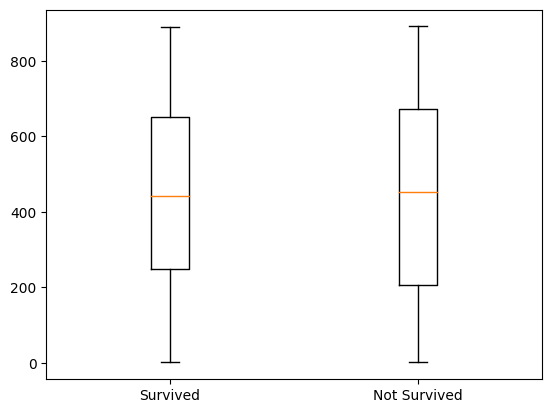

In [17]:
num_nan = train_data['PassengerId'].isna().sum()
print(num_nan)
print(train_data['PassengerId'].dtype)

plt.boxplot([survived_by_PassengerID, not_survived_by_PassengerID], labels=['Survived', 'Not Survived'])
plt.show()

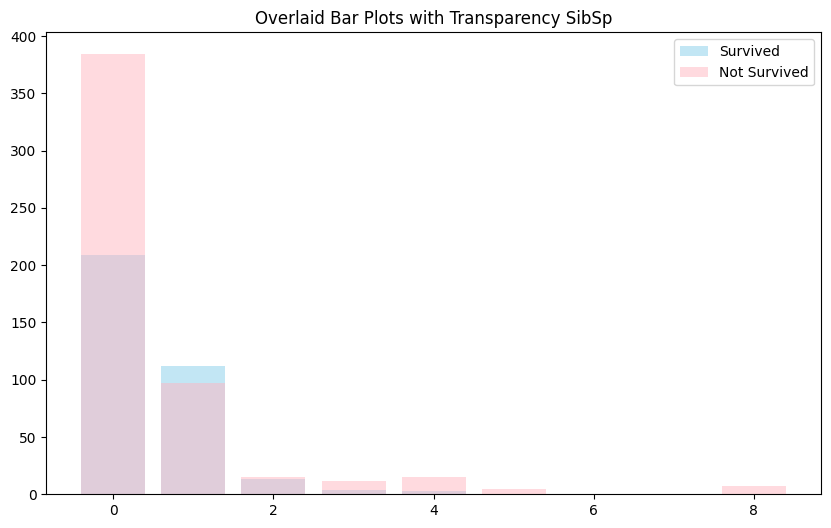

In [18]:
# Looking at SibSp, Embark

counts = train_data[train_data['Survived'] == 1]['SibSp'].value_counts()
plt.figure(figsize=(10, 6))
bars1 = plt.bar(counts.index , counts, alpha = 0.5, color = 'skyblue')
counts = train_data[train_data['Survived'] == 0]['SibSp'].value_counts()
# plt.figure(figsize=(10, 6))
bars2 = plt.bar(counts.index , counts,  alpha = 0.5, color = 'lightpink')
plt.title('Overlaid Bar Plots with Transparency SibSp')
plt.legend((bars1[0], bars2[0]), ('Survived', 'Not Survived'))
plt.show()


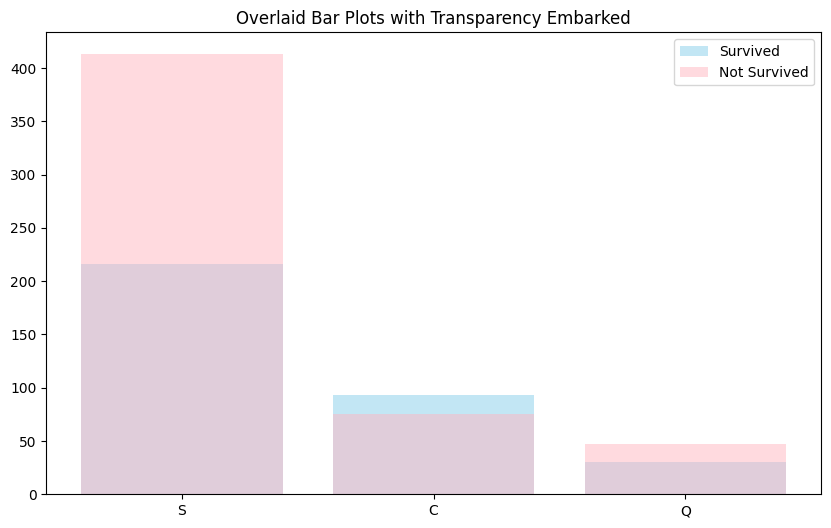

In [19]:
counts = train_data[train_data['Survived'] == 1]['Embarked'].value_counts()
plt.figure(figsize=(10, 6))
bars1 = plt.bar(counts.index , counts, alpha = 0.5, color='skyblue')
counts = train_data[train_data['Survived'] == 0]['Embarked'].value_counts()
# plt.figure(figsize=(10, 6))
bars2 = plt.bar(counts.index , counts,  alpha = 0.5, color= 'lightpink')
plt.title('Overlaid Bar Plots with Transparency Embarked')
plt.legend((bars1[0], bars2[0]), ('Survived', 'Not Survived'))
plt.show()

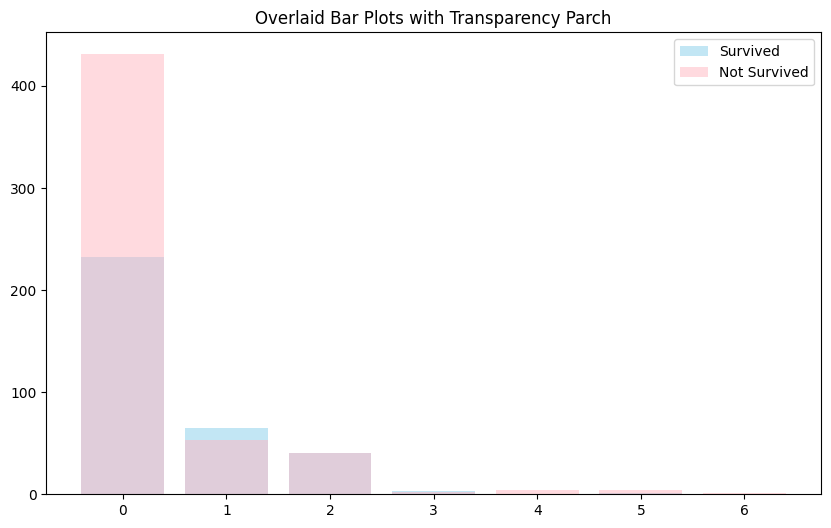

In [20]:
# counts = train_data.loc[train_data.Survived == 1]['Parch'].value_counts()
counts = train_data[train_data['Survived'] == 1]['Parch'].value_counts()
plt.figure(figsize=(10, 6))
bars1 = plt.bar(counts.index , counts, alpha = 0.5, color= 'skyblue')
counts = train_data[train_data['Survived'] == 0]['Parch'].value_counts()
# plt.figure(figsize=(10, 6))
bars2 = plt.bar(counts.index , counts,  alpha = 0.5, color = 'lightpink')
plt.title('Overlaid Bar Plots with Transparency Parch')
plt.legend((bars1[0], bars2[0]), ('Survived', 'Not Survived'))
plt.show()